# Matplotlib数据可视化私房手册

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib as mpl

## Matplotlib两种画图接口

注意Matplotlib风格和面对对象风格的差异，虽然绝大多数的plt函数都可以直接转换成ax方法，但是并不是所有的命令都可以这样用。特别是用来设置坐标轴上下限、坐标轴标题和图形标题的函数，大都稍有差别。一些常见的转换如下所示：
- plt.xlabel() -> ax.set_xlabel()
- plt.xlim() -> ax.set_xlim()
- plt.title() -> ax.set_title()

小提示：可以用`ax.set()`方法一次性的全部设置好。

**MATBLAB风格**
```
x = np.linspace(0, 10, 100)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));
```
**面对对象风格**
```
fig, ax = plt.subplots(2)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
```
小提示：如果`plt.subplots()`不加任何参数，则默认返回一个`ax`。

## 基础技巧

### 线条的颜色和风格

一共有6种表示颜色的方法，通过`color`参数设置： 
```
'blue'           # 标准颜色名称
'g'              # 缩写颜色代码（rgbcmyk），分别为rgb模型和适合印刷的c（青色）m（洋红）y（黄色）k（黑色）模型。
'0.75'           # 范围在0~1的灰度值
'#FFDD44'        # 十六进制表示的RGB颜色（RRGGBB，00~FF）
(1.0, 2.0, 0.3)  # RGB元组，范围在0~1
'chartreuse'     # HTML颜色名称
```
线型和其简写对应如下，通过`linestyle`参数设置：
```
'solid'   -> '-'
'dashed'  -> '--'
'dashdot' -> '-.'
'dotted'  -> ':'
```
颜色和线型可以组合起来，组成一个非关键字参数的简写。如`'-g'`,`'-.k'`。

### 标记点的风格

以下是标记点的常见的集中风格：

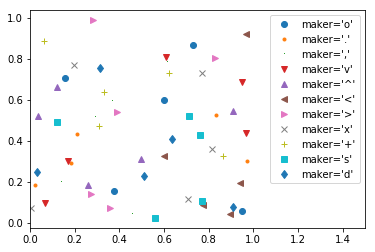

In [21]:
rng = np.random.RandomState(42)
for maker in ['o', '.', ',', 'v', '^', '<', '>', 'x', '+', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), maker, label=f"maker='{maker}'")
plt.legend(numpoints=1)
plt.xlim(0, 1.5);

### 调整坐标轴上下限

除了通过`plt.xlim`和`plt.ylim`方法，面对对象风格通过`ax.set_xlim`和`ax.set_ylim`方法设置，还可以通过`plt.axis([x.min, x.max, y.min, y.max])`方法进行一次性的设置。  
`plt.axis`还可以传入字符串，进行一些特殊的设置，比较常用的有：
- 'on'或者'off'，打开或者关闭轴。
- 'tight' 收紧坐标轴，使之没有空白区域。
- 'equal','scaled','square','image'等，均是对$x$轴和$y$轴的比例进行设置。

### 设置图形标签

可以通过`plt.xlabel`和`plt.ylabel`方法进行设置（面对对象方式使用`ax.set_xlabel`和`ax.set_ylabel`设置），但是最简单的方法还是在`plt.plot`方法中，通过传入`label`参数进行设置。

### 配置图例

#### 选择图例显示的元素

一种方法是将需要显示的线条传入`plt.legend`，另一种方法非常简单，只需要为在图例中显示的线条设置标签即可，需要注意的是默认情况下，图例会忽略掉不带标签的元素，注意这里y是二维数组，仔细观察此时是如何画图的。

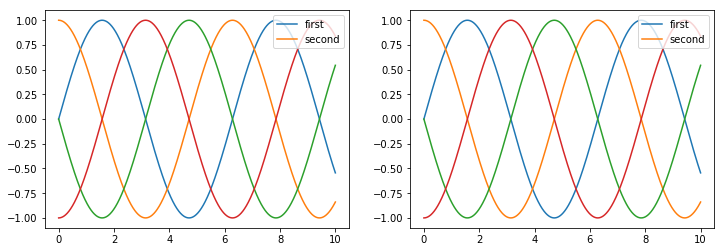

In [168]:
# 注意这里y通过广播，最终形成一个2维数组，x分别与y的列组成x轴和y轴的坐标，确切的说是第一个维度
x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
# 第一种方法，将线条传入legend
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
lines = plt.plot(x, y)
lines
plt.legend(lines[:2], ['first', 'second'], loc='upper right')
# 第二种方法，为线条设置label
plt.subplot(1, 2, 2)
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(loc='upper right');

#### 在图例中显示不同大小的点

基本思路就是叠加要多个图层，每个图层显示一种大小的点，图层的坐标设置为空列表。  
注意当使用散点图时，用`scatterpoints`来控制显示点个数，当使用线图时，用`numpoints`控制显示点的个数，另外，在第一个散点图中，要把label设置为None，否则默认会设置一个图例：

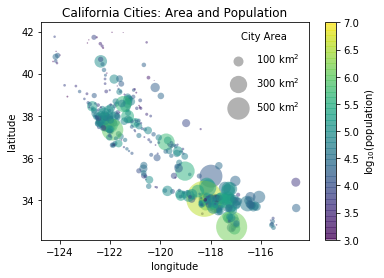

In [127]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')
# 提取要绘图的数据
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']
# 用不同尺寸和颜色的散点图表示数据，但是不带标签，此时没有图列
# 颜色的数值分布不均匀，因此对其取对数缩放到较小的范围里
plt.scatter(
    lon,
    lat,
    s=area,
    alpha=0.5,
    linewidths=0,
    c=np.log10(population),
    label=None, # 注意，这里需要将label设置为None，否则会显示一个图例
    cmap='viridis')
plt.axis(aspect='equal')  # 没发现图形有什么变化
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
# 将颜色显示范围压缩到3~7之间，即小于等于3的数值的颜色等于3的颜色，可以看此时population的直方图，主要集中在3~7之间
plt.clim(3, 7)
plt.title('California Cities: Area and Population')
# 添加3个图层，注意此时数据为空列表，设置marker为不同大小，面积此时最小为0.81，最大为1302
for area in [100, 300, 500]:
    plt.scatter(
        [], [],
        c='k',
        alpha=0.3,
        s=area,
        linewidths=0,
        label=str(area) + ' km$^2$')
plt.legend(
    title='City Area', frameon=False, labelspacing=1, scatterpoints=1);

#### 同时显示多个图例

基本思路是从头开始创建一个新的`legend`原始对象，然后用`ax.add_artist`方法在图上添加第二个图例：

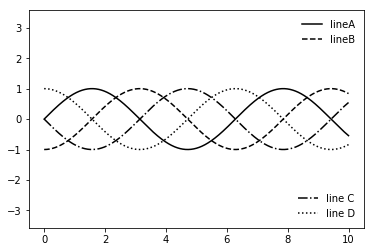

In [146]:
fig, ax = plt.subplots() # 如果空值，默认只有一个ax

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += plt.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
plt.axis('equal')

# 设置第一个图例要显示的线条和标签
plt.legend(lines[:2], ['lineA', 'lineB'], loc='upper right', frameon=False)

# 手动创建第二个图例，通过add_artist方法添加到图上
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)
ax.add_artist(leg);

### 配置颜色条 

#### 如何选择配色方案

所有的颜色配置方案可以在IPython里面通过`plt.cm.<TAB>`查看，也可以通过`plt.colormaps()`把所有颜色表打印出来。一般来说，只需要关注三种不同的配色方案（主要根据亮度的变化来区分）：
1. 顺序配色方案(Sequential)  
由一组连续的颜色构成的配色方案（如binary或者viridis、cubehelix），亮度顺序变化。
2. 互逆配色方案(Diverging)  
通常由两种互补的颜色构成，表示正反两种含义（如RdBu或者PuOr）,中间亮度最高，向两端递减。
3. 定性配色方案(Qualitative)  
随机顺序的一组颜色（例如rainbow或jet）,不同种类的颜色用以区别不同数据的类别。
4. 循环配色方案(Cyclic)  
数据围绕端点值显示的时候，适合用此配色方案，比如表示一天的时间，相位角等等。  
[【点击这里】](https://matplotlib.org/1.4.1/users/colormaps.html)查看官网的详细描述。

In [55]:
from matplotlib.colors import LinearSegmentedColormap


def grayscale_cmap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    # 将RGBA色转换为不同亮度的灰度值，参考http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3]**2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors)


def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    # cmap可以把数值转换为RGBA的一维数组，如果传入的是一维数组（每一个数值映射一个颜色），则返回一个二维数组，行是数值对应的RGBA数组
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(
        2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    """
    imshow接受3种形式的数组，(M,N)每一个数值对应一种颜色，(M, N, 3)每一个数值对应RGB格式的3元数组，(M,N,4)每一个数值对应RGBA格式的4元
    数组，colors是（256，4）形式的数组（表示有256种颜色），因此需给colors增加一维，以构成3维数组，每一个点映射为RGBA格式的4元数组。否
    则会认为是256行，4列，每一个数值对应一种颜色。
    """
    # 原始为（1，256）的二维数组，比例相差太大，因此将256缩放到0~10之间
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

定性配色方案（亮度随机，适合用来用不同颜色区分不同数据种类）：

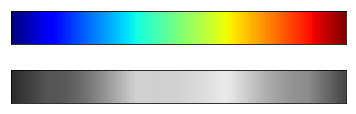

In [5]:
view_colormap('jet')

顺序配色方案（亮度顺序变化，大多数情况下适用）：

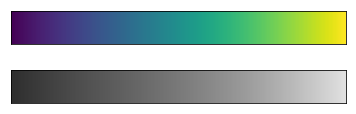

In [55]:
view_colormap('viridis')

互逆配色方案（中间最亮，能轻易分辨正值和负值）：

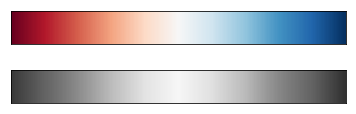

In [56]:
view_colormap('RdBu')

#### 颜色条刻度的限制与扩展功能的设置

1. 因为`np.random.random`返回\[0, 1)之间的随机数，因此小于0.01的数大约占总的生成的数的1%。
2. `np.random.normal(0, 3, np.count_nonzero(specles)`返回均值是0,标准差是3的数组（也就是噪点），其最大值约为10，最小值约为-10，这些噪点大大扩展了颜色的范围，原来的值（99%的值）在-1~1之间，现在集中在颜色的中部，因此图像整体呈现白色。
2. 通过`plt.clim(-1, 1)`把颜色范围压缩在-1~1之间（即大于1的值的颜色当作1处理，-1同理），因此去除了噪声的影响。

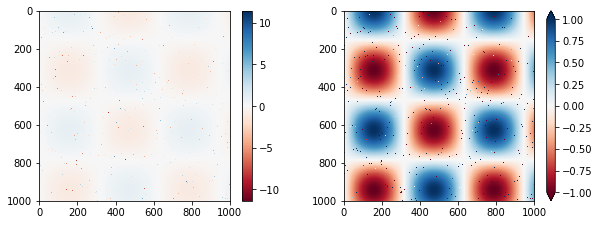

In [2]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
# 为图形像素设置约1%的噪点
speckles = (np.random.random(I.shape) < 0.01)
# 注意I[speckles]返回的是一维数组，且对索引赋值直接改变原数组
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

#### 离散型颜色条

虽然颜色条默认都是连续的， 但有时也需要表示离散数据。最简单的做法就是使用`plt.cm.get_cmap()`函数， 将适当的配色方案的名称以及需要的区间数量传进去即可。

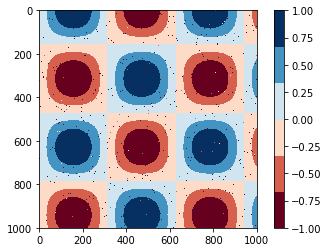

In [167]:
plt.imshow(I, cmap=plt.cm.get_cmap('RdBu', 6))
plt.colorbar()
plt.clim(-1, 1);

### 多子图

#### 使用`plt.axes`手动创建子图

**Matplotlib风格** 

通过向`plt.axes`传递一个代表坐标系统`[left, bottom, width, height]`的参数创建子图：

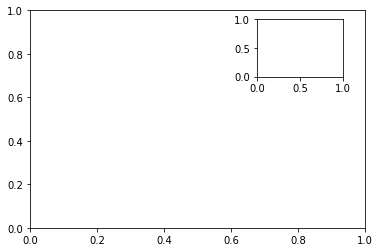

In [33]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

**面对对象风格**

通过`fig.add_axes`添加子图：

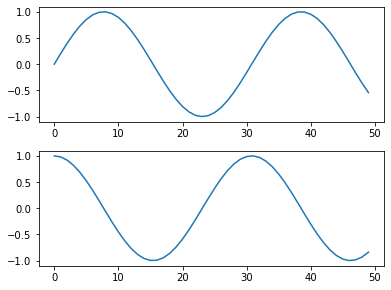

In [5]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0.6, 0.8, 0.4])
ax2 = fig.add_axes([0, 0.1, 0.8, 0.4])
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

#### 通过`plt.subplot`创建网格子图

注意和`plt.axes`创建的子图的区别，`plt.subplot`创建的都是网格形式的子图，即子图都是并列的，而`plt.axes`可以创建任意位置，甚至重叠的子图。  
Matplotlib风格通过`plt.subplot`函数创建，面对对象通过`fig.add_subplot`创建子图。  
可以通过`plt.subplots_adjust`调整子图之间的间隔，面对对象方式通过`fig.subplots_adjust`调整子图间距，其中`hspace`和`wspace`参数分别调整子图横向和纵向的空隙与坐标轴平均长度的比值（比如`wspace=0.4`，此时$x$坐标轴为`xmin=0,xmax=1`，$x$轴长度为1，横向空隙的长度则等于1*0.4）。

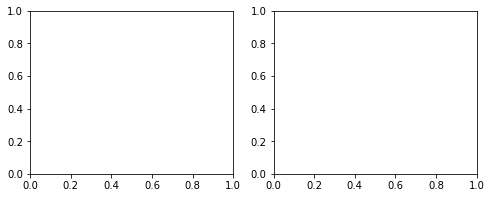

In [10]:
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

有一点要注意的地方是，在jupyter中，使用面对对象的方式画图，`fig`的位置很重要，如果创建`fig`和`add_subplot`不在一个单元格里，则不会直接画图，需要单独的输入`fig`才会显示。

In [15]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [16]:
fig.add_subplot()  # 此时不会画图，如果fig和fig.add_subplot在同一个单元格，则会画图

<AxesSubplot:>

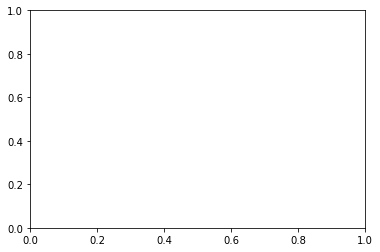

In [13]:
fig  # 单独再输入一次fig，图像才会显示

#### 通过`plt.subplots`批量创建子图

`plt.subplots`一次创建多个网格形式的子图，返回一个Numpy数组，通过注意可以通过`sharex`和`sharey`参数设置不同子图之间的关联关系。  
如果直接`plt.subplot()`，则只返回一个ax，而不是一个ax的数组。

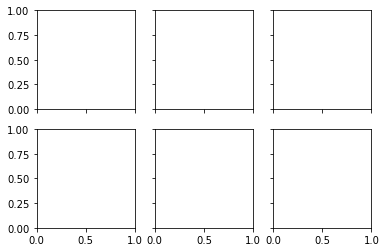

In [7]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True);

注意，面对对象方式没有`subplots`方法，不能一次性的返回包含多个ax的网格。

#### 通过`plt.GridSepc`实现更复杂的排列方式

注意，`plt.GridSepc`本身不能创建图形，它只是`plt.subplot`命令可以识别的简易接口。  

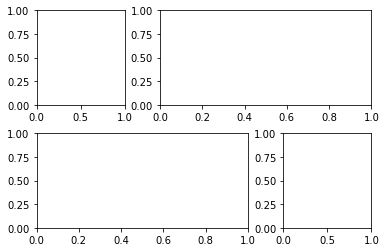

In [3]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

例子（创建多轴频次直方图）：

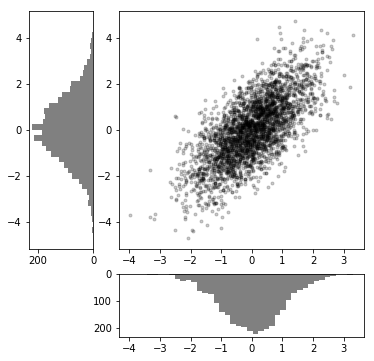

In [115]:
# 创建二维正态分布的数据
np.random.seed(42)
mean = [0, 0]
cov = [[1, 1], [1, 2]]  # 协方差矩阵，需要满足半正定条件
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 设置网格，使用Matplotlib方式
# plt.figure(figsize=(6, 6))
# grid = plt.GridSpec(4, 4, wspace=0.4, hspace=0.3)
# main_ax = plt.subplot(grid[:-1, 1:])
# y_hist = plt.subplot(grid[:-1, 0])
# x_hist = plt.subplot(grid[-1, 1:])

# 设置网格，使用面对对象方式
"""
如何理解使用切片选取子图：
1. 把子图看成一个二维的数组，每一个子图是其中的一个元素。
2. 从上往下，从左往右数。
3. 切片的第一维代表行，第二维代表列。
因此，此例中，main_ax的grid[:-1, 1:]意味着，从上往下选取前3行，后3列。
"""
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, wspace=0.4, hspace=0.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0])
x_hist = fig.add_subplot(grid[-1, 1:])

# 主坐标轴画散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# 次坐标轴画频次直方图
"""
注意：
orientation参数表示x,y轴互换
invert_xaxis、invert_yaxis表示沿x轴或者y轴翻转，水平均为x轴，垂直方向为y轴
"""
x_hist.hist(x, 40, histtype='stepfilled', color='gray', orientation='vertical')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', color='gray', orientation='horizontal')
y_hist.invert_xaxis()

#### 修改子图之间的间距

可以通过`pyplot.tight_layout()`方法设置为紧凑模式，并且可以通过`pad`参数调整子图之间的间隔。

### 文字、箭头与注释

#### 坐标变换和文字位置

要控制文字在图形中的位置，则需要一套坐标体系，因为位置总是相对的。Matplotlib一共有三种坐标体系（在数学体系中，是从一种体系变换到另外一种体系，因此这些变换的工具都在`matplotlib.transforms`子模块中）：
1. `ax.transData`  
以数据为基准的坐标变换。
2. `ax.transAxes`  
以坐标轴为基准的坐标变换。
3. `fig.transFigure`  
以图形为基准的坐标变换。

注意：`transFigure`是`Figure`的属性而不是`ax`的，因此只能用`fig`来调用。

<IPython.core.display.Javascript object>


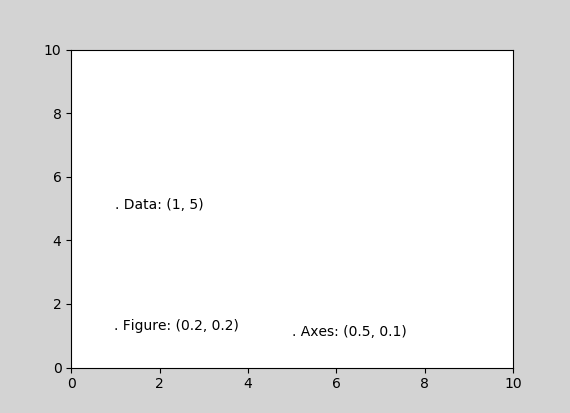

In [2]:
%matplotlib notebook
fig = plt.figure(facecolor='lightgray') # figure指的是整个画布，ax指的是整个坐标
ax = plt.axes()
ax.axis([0, 10, 0, 10])
# ax.transData是以坐标的数值为标准，因此改变了坐标的范围，文本位置也会改变，其它两种方式位置不会发生变化，拖动该点观察坐标的变化。
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)            
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

#### 文字与注释

#### 箭头与注释 

### 自定义坐标刻度

要理解自定义坐标刻度，先理解Matplotlib的对象层次。Matplotlib用对象表现任意图形元素。figure是一个盛放图形元素的包围盒（bounding box）。每个 figure都会包含一个或多个axes对象，每个axes对象又会包含其他表示图形内容的对象。坐标轴刻度线也不例外。每个axes都有xaxis和yaxis属性，每个属性同样包含构成坐标轴的线条、刻度和标签的全部属性。

#### 主要刻度和次要刻度

次要刻度一般不会显示，但是在对数图中可以看到（设置`xscale`参数或者`yscale`参数）。次要刻度没有标签，通过`locator`和`formatter`对象可以对刻度进行设置,通过`axes`对象的`get`方法（`get_major_locator`，`get_minor_locator`，`get_major_formatter`，`get_minor_formatter`）获取对象，通过`set`方法（`set_major_locator`，`set_minor_locator`，`set_major_formatter`，`set_minor_formatter`）设置对象。  
可以和excel对照，`locator`是excel的刻度线，`formatter`是excel的刻度标签，`locator`的对象层级比`formatter`高，如果不设置`locator`，则`formatter`也不会显示。

#### 隐藏刻度标签

通过将`locator`设置为`plt.NullLocator`可以隐藏刻度标签，如下：

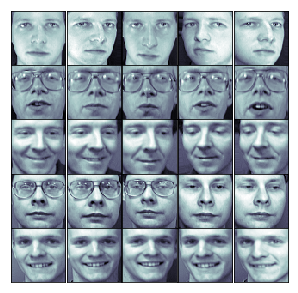

In [54]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[i * 10 + j], cmap="bone")

#### 增减刻度数量

通过将`locator`设置为`plt.MaxNLocator(n)`设置坐标轴包含几条刻度线，从而避免刻度线过于拥挤：

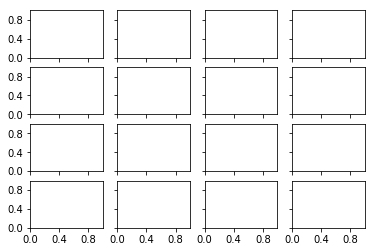

In [2]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for axi in ax.flatten():
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

####  花式刻度格式

可以通过`formatter`来控制刻度的显示，如下面的例子，用$\pi$来显示刻度：

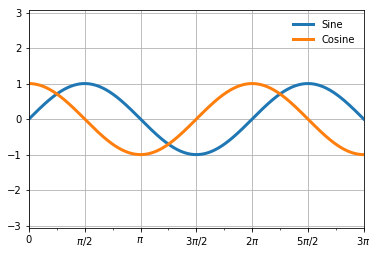

In [49]:
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label="Sine")
ax.plot(x, np.cos(x), lw=3, label="Cosine")

ax.legend(frameon=False)
ax.grid(True)
ax.axis('equal')
# 注意，此项必须放在ax.axis('equal后面')，否则的话会失效，猜测是因为如果放在前面的话，ax.axis('equal')会重新对整个坐标系排版。
ax.set_xlim(0, 3 * np.pi)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))


def format_func(value, tick_number):
    """
    测试发现，每次会传给函数一个刻度值，此例7个刻度值加上首尾共9个，传完了以后会重复传16次，
    函数一共会调用（刻度个数+2）*16次，此例一共调用了(7+2)*16=144次，
    不知道为什么会调用这么多次。
    """
    # 用传入的坐标值除以二分之Π，得到一个二分之Π的倍数
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"  # 1和2需要单独处理，否则会显示为1Π/2和1Π
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)  # '//'取整除 - 返回商的整数部分


ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

#### 格式生成器和定位器小结 

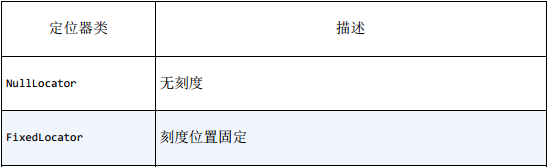

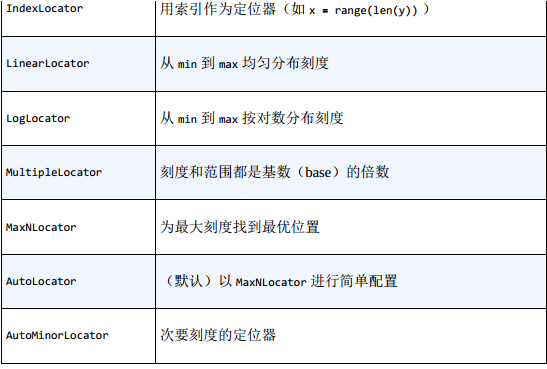

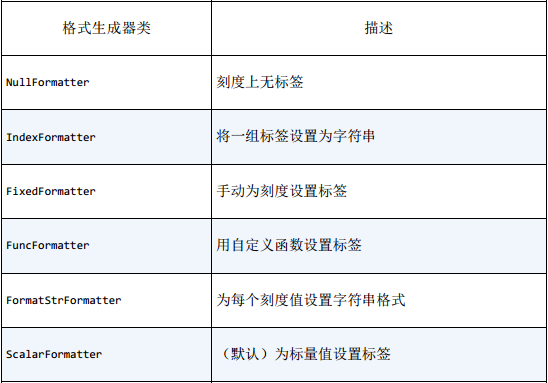

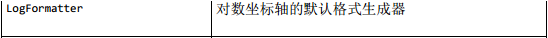

### 自定义：配置文件与样式表

#### 修改默认配置

Matplotlib每次加载时，都会定义一个运行时配置（rc），包含所有创建的图形元素的默认风格。
- 可以用`plt.rc()`或者`matplotlib.rc()`简便方法修改配置。
- 通过`matplotlib.rcdefaults()`方法重载原始配置。
- 通过`matplotlib.rcParams`查看所有配置，通过`matplotlib.rcParams[属性名称(如'figure.figsize')]`查看具体某一项配置。

自定义配置的详细资料点击[【官网链接】](https://matplotlib.org/users/customizing.html)

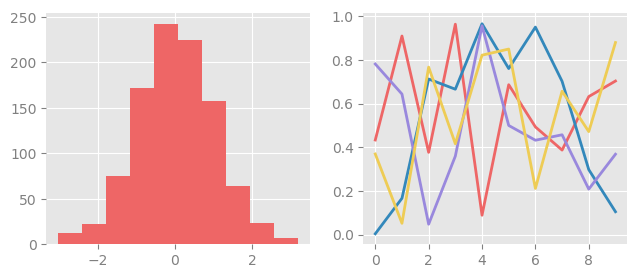

In [102]:
default_rc = plt.rcParams.copy()

from matplotlib import cycler
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
# axisbelow表示坐标轴的线在图像的下方
# prop_cycle表示设置某一个属性循环（prop是属性property的意思），这里通过cycler对象指定颜色属性循环。
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
# patch指的是各种形状，比如圆形、正方形等等，在matplotlib.patches包里，除了形状，还有各种线条（路径），在matplotlib.path包里。
plt.rc('patch', facecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

x = np.random.randn(1000)
plt.figure(figsize=(7.5, 3))
plt.subplot(1, 2, 1)
plt.hist(x)
plt.subplot(1, 2, 2)
for i in range(4):
    plt.plot(np.random.rand(10))

#### 样式表

通过`plt.style.available`命令可以查看所有支持的样式表，[点击这里](https://blog.csdn.net/weixin_42968458/article/details/82889736)可以查看所有风格的展示：

In [44]:
plt.style.available[:5]

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight']

通过`with plt.style.context(stylename)`可以临时使用样式配置文件：

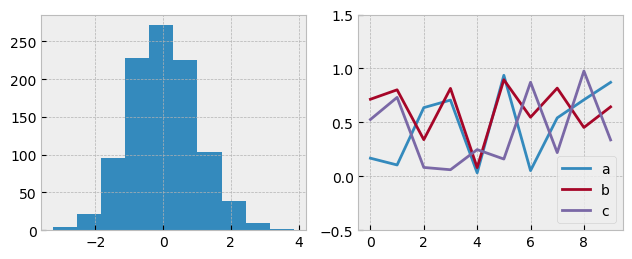

In [28]:
# 重载原始配置
import matplotlib as mpl
mpl.rcdefaults()

def hist_and_line():
    np.random.seed(42)
    fig, ax = plt.subplots(1, 2, figsize=(7.5, 2.8))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
        ax[1].set_ylim(-0.5, 1.5)
        ax[1].legend(['a','b','c'], loc='lower right')

with plt.style.context('bmh'):
    hist_and_line()

通过`plt.style.use()`选择某一种风格（注意，使用`use`选择风格以后将都是这种风格），仍然使用`matplotlib.rcdefaults()`恢复默认配置：

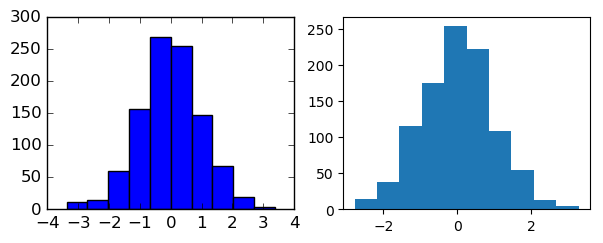

In [37]:
plt.figure(figsize=(7, 2.5))
plt.style.use('classic')
plt.subplot(1, 2, 1)
plt.hist(np.random.randn(1000))
mpl.rcdefaults()
plt.subplot(1, 2, 2)
plt.hist(np.random.randn(1000));

## 散点图

可以通过`plt.plot`或者`plt.scatter`两种方法画散点图。不同在于`plt.scatter`方法具有更高的灵活性，可以单独控制每个散点与数据匹配，也可以让每个散点有不同的属性，但是大数据集时，由于要对每个点进行渲染，`plt.scatter`效率不如`plt.plot`方法。  
散点图可以通过点的大小及颜色来表示多维数据的信息，以鸢尾花数据为例：

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


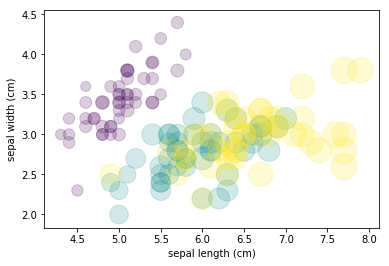

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)
features = iris.data.T  # 注意需要转置，行代表x的坐标
plt.scatter(
    features[0],
    features[1],
    s=100 * features[2], # 通过大小表示第三个特征
    c=iris.target, # 颜色为标签
    alpha=0.2,
    cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## 可视化异常处理

基本误差线可以通过`plt.errorbar`来创建，连续误差matplotlib没有内置方法可以实现，但是可以通过`plt.plot`函数和`plt.fill_between`函数组合实现。另外，seaborn有更为简便的API来实现连续误差。

## 等高线图

等高线主要可以通过`plt.contour`,`plt.contourf`（和`plt.contour`一样，只是用颜色来填充空白区域）和`plt.imshow`三个函数来实现，需要注意的是，`plt.contour`方法如果只用一种颜色，默认使用虚线表示负数，实线表示正数：

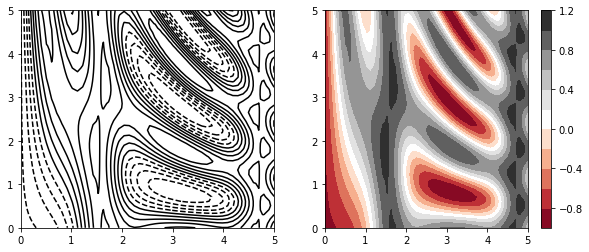

In [179]:
# 生成Z的函数
def f(x, y):
    return np.sin(x)**10 + np.cos(10 + y * x) * np.cos(x)


x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, 10, colors='black')  # 注意这里的参数是colors而不是color
# plt.colorbar()
ax = plt.subplot(1, 2, 2)
mapper = plt.contourf(X, Y, Z, 10, cmap='RdGy')
# 注意这里给子图设置colorbar的方法
# plt.colorbar(mapper, ax=ax)
# 直接设置就可以？不需要plt.colorbar(mapper, ax=ax)
plt.colorbar();

可以通过`plot.contour`和`plt.imshow`组合显示等高线，使用`plt.imshow`需要注意以下几点：
1. `plt.imshow`默认原点在左上角，因此需要通过`origin`参数改成左下角。
2. `plt.imshow`不支持用$x$，$y$轴的数据来设置网格，默认的坐标轴单位为1（不设置`extent`参数的话，默认坐标轴为(-0.5, 49.5, -0.5, 49.5)，因此需要通过`extent`参数来设置图形的坐标范围。
3. `plt.imshow`会自动调整坐标轴精度适应数据显示，可以通过plt.axis(aspect='image')来设置$x$轴和$y$轴的单位。（这里没搞明白什么意思，设不设置图形没有变化）

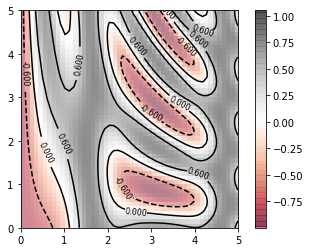

In [49]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', alpha=0.5, cmap='RdGy')
plt.colorbar();

补充一下matplotlib是怎么处理二维数组的：
1. x和y需要相同的形状，相同位置的数据两两配对，构成一个新的二维数组，其元素是两两配对的元组，元组是坐标轴上的点的坐标。
2. 将列上的点进行连线，也就是二维数组的0轴。

`np.merigrid`返回的就是分别代表$x$坐标和$y$坐标的二维数组。

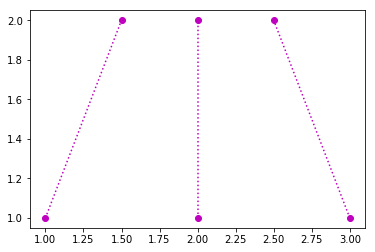

In [54]:
x = np.array([[1, 2, 3], [1.5, 2, 2.5]])
y = np.array([[1, 1, 1], [2, 2, 2]])
plt.plot(x, y, ':om');

## 频次直方图

### 频次直方图

通过`plt.hist`方法可以快速生成直方图，该方法是和`np.histogram`关联的，该方法有很多调整计算过程和显示效果的选项。`plt.hist`返回两个数组，一个是各区间的频次数组，一个是区间划分边界数组，具体参考[《Numpy私房手册》](Numpy私房手册.ipynb)的数据区间划分一节。

(array([0.00603606, 0.04225239, 0.13520765, 0.35009124, 0.33801912,
        0.22816291, 0.08812641, 0.01931538]),
 array([-3.50134358, -2.67298808, -1.84463258, -1.01627708, -0.18792158,
         0.64043392,  1.46878942,  2.29714492,  3.12550042]),
 <a list of 8 Patch objects>)

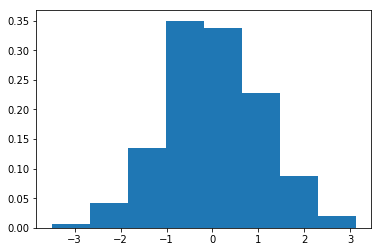

In [13]:
data = np.random.randn(1000)
plt.hist(data, bins=8, density=True) # density设置为True可以将频次转换为概率密度函数

### 二维频次直方图

使用`np.hist2d`和`np.hexbin`绘制二维频次直方图，同样的Numpy对应的函数为`np.histogram2d`,返回$x$轴和$y$轴的频次的数组：

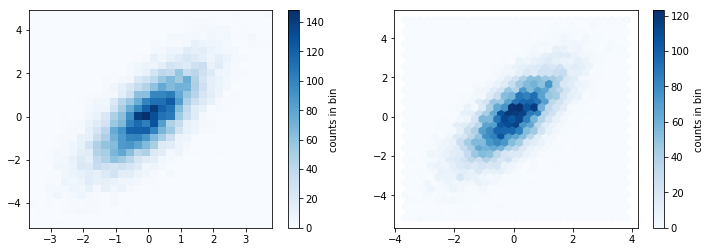

In [4]:
mean = [0, 0]
cov = [[1, 1], [1, 2]] # 协方差矩阵
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist2d(x, y, bins=30, cmap='Blues')
plt.colorbar(label='counts in bin')
plt.subplot(1, 2, 2)
plt.hexbin(x, y, gridsize=30, cmap='Blues')
plt.colorbar(label='counts in bin');

### 核密度估计

核密度估计(KDE：kernel density estimate)起到的作用是假设空间中离散的数据符合某种分布，并拟合一个平滑的函数，`seaborn`有更简单的API实现：  

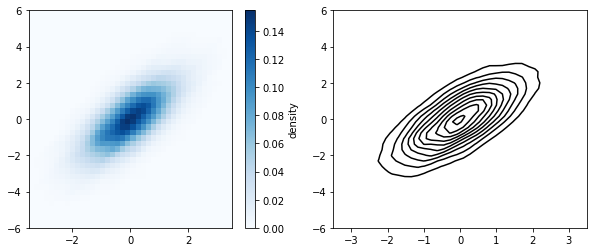

In [62]:
from scipy.stats import gaussian_kde

mean = [0, 0]
cov = [[1, 1], [1, 2]]  # 协方差矩阵
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# 拟合数组维度[Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 用一对规则的网格数据进行拟合
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 画出结果图
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(
    Z.reshape(Xgrid.shape),
    origin='lower',
    aspect='auto',
    extent=[-3.5, 3.5, -6, 6],
    cmap='Blues')
plt.colorbar(label="density")
plt.subplot(1, 2, 2)
plt.contour(
    Xgrid, Ygrid, Z.reshape(Xgrid.shape), 10, colors='black');

## 用Matplotlib画三维图

## 用Basemap可视化地理数据

## 用seaborn做数据可视化

Seaborn以matplotlit为基础，可以理解它主要可以做2件事，1、可以使用Seaborn方便的为matplotlib制定风格。2、为常用的统计图形定义了许多简单的高级函数，并与Pandas DataFrame 的功能结合的更好。习惯上，使用sns作为seaborn的简写。  
Seaborn的[【官网地址】](http://seaborn.pydata.org/index.html)

### Seaborn基础技巧

#### Seaborn美化

In [154]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

##### 使用Seaborn主题风格

虽然matplotlib非常强大，但是要想做出好看的图表，需要进行大量的配置，比较繁琐。而seaborn提供了更便捷的接口。  
首先可以通过`sns.set()`快速切换到seaborn风格（0.8版本之前的seaborn，当`import`的时候就自动切换到seaborn风格，0.8以后需要显示调用）。seaborn把matplotlib的各种参数分成两大类，一类专门美化用，一类专门对元素进行缩放用，以方便其适应各种不同的环境。  
手动调整这些参数的接口被分为两对，美化类主要使用`axes_style()`和`set_style()`两个函数，缩放类主要使用`plotting_context()`和`set_context()`函数。不管哪种类型，第一个函数返回一个参数的字典，第二个设置matplotlib的默认参数。  
seaborn一共有5套主题：`darkgrid`,`whitegrid`,`dark`,`white`和`ticks`（默认是`darkgrid`）:

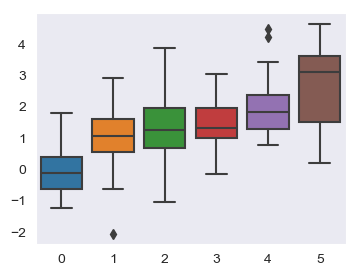

In [170]:
sns.set_style("dark")
data = np.random.randn(20, 6) + np.arange(6) / 2
sns.boxplot(data=data);

也可以向`set_style()`传递一个字典，指定修改某个seaborn主题的细节：

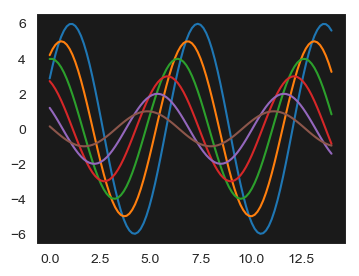

In [169]:
sns.set_style('dark', {'axes.facecolor':'.1'})
sinplot()

##### 设置临时的主题风格

当向`axes_style()`传递参数时，并且配合`with`关键字，可以临时的更改主题风格。  
这里有个疑问，使用下面的代码，不起作用，推测可能是因为对`subplots`和`subplot`生成的`axes`渲染机制不同，对`subplot`生成的`axes`是逐个的渲染，而对`subplots`生成的`axes`是批量的渲染，且只有设置全局的`style`才生效，设置临时的`style`不起作用。

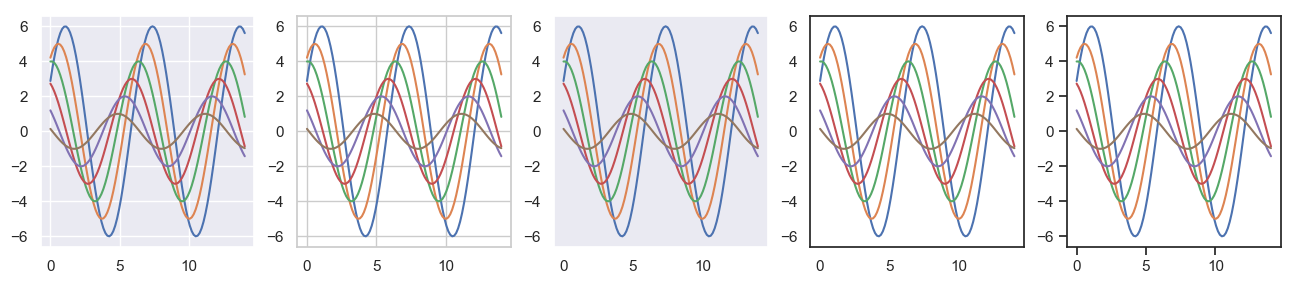

In [159]:
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

f = plt.figure(figsize=(16, 3))
for idx, style in enumerate(styles, 1):
    with sns.axes_style(style):
        ax = plt.subplot(1, 5, idx)
        sinplot()

# f, ax = plt.subplots(1, 5, figsize=(14, 3))
# x = np.linspace(0, 14, 100)
# for idx, style in enumerate(styles):
#     with sns.axes_style(style):
#         for i in range(1, 7):
#             ax[idx].plot(x, np.sin(x + i * .5) * (7 - i))

##### 移除坐标轴边框

使用`despine()`方法可以快速移除`white`和`ticks`主题坐标轴右边和上面的边框，要注意的是，要先画图，然后再调用函数去掉边框，次序不能颠倒：

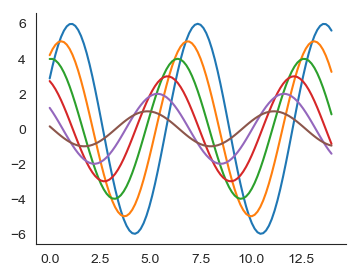

In [168]:
with sns.axes_style('white'):
    sinplot()
    sns.despine()

`despine`可以接受`offset`和`trim`参数，这两个参数不是很好理解，`offset`参数的意思是将坐标轴离数据离的远一点，因为离的远了， 自然看起来就像是$x$轴和$y$轴分开了一样，`trim`的意思是如果刻度线没有覆盖整个坐标轴，就进行修剪，简单来说坐标轴首尾都有刻度线。

In [1]:
import numpy as np

In [3]:
from pandas import DataFrame

In [4]:
df = DataFrame(np.random.randn(20, 6) + np.arange(6) / 2)

In [5]:
df

,0,1,2,3,4,5
0,0.673840,-0.023053,1.606990,0.296081,2.253649,2.643523
1,0.157076,1.255063,-1.293850,0.475580,2.933928,2.509160
2,-0.010934,0.105639,2.402835,3.601196,2.052719,2.545690
3,-0.246833,-0.891876,-0.800700,2.677978,1.077056,3.861471
4,-0.699019,-1.484149,0.615590,2.605700,0.128973,2.333102
5,1.068325,3.018198,-2.302048,1.960421,3.068696,1.572325
6,-0.331423,-0.359893,0.450088,3.409337,1.925238,3.482689
7,-0.541115,0.900666,1.228193,1.712314,2.381662,1.908294
8,0.771151,-0.729242,1.367369,1.314549,3.003590,0.335725
9,-0.470166,0.770000,0.139978,0.587639,3.324459,1.975716


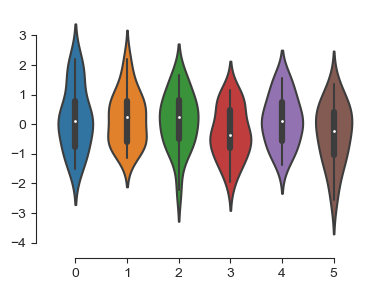

In [185]:
sns.set_style('ticks')
data = np.random.randn(20, 6) + np.arange(6) / 2
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

最后，还可以控制哪几个轴不显示（默认是上边和右边）：

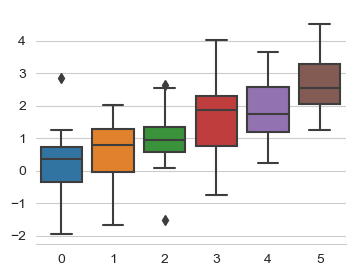

In [167]:
sns.set_style('whitegrid')
sns.boxplot(data=data)
sns.despine(left=True)

##### 缩放图形元素 

seaborn把美化分成了2类，一类主要针对颜色，另一类针对字体大小，线条粗细等等。这一类通过`sns.plotting_context()`和`sns.set_context()`来显示配置和设置配置。  
这里的`context`可以理解成环境，比如这个图片是要在纸上打印，还是在notebook这样的交互式界面显示，这里的纸和notebook交互界面就是context环境，针对不同的环境，seaborn提供一整套的主题配置。`plotting_context`和`axes_style`是对应的，`set_context`和`set_style`对应的，作用和调用方式都差不多。  
一共有4种主题，分别是`paper`，`notebook`，`talk`，`poster`。其中`notebook`是默认的：

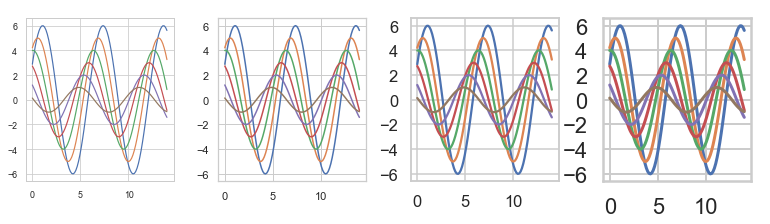

In [136]:
sns.set()
plt.figure(figsize=(13, 3))
plt.subplots_adjust(wspace=0.3)
styles = ['paper', 'notebook', 'talk', 'poster']
sns.set_style('whitegrid')
for i, style in enumerate(styles, 1):
    with sns.plotting_context(style):
        ax = plt.subplot(1, 4, i)
        sinplot()

### Seaborn高级图形

基本上，seaborn根据图表的作用分为5大类，分别是关系图、分类图、分布图、回归图和矩阵图，每一大类下面根据图形的绘制方式包含多个具体的绘图类。每一大类中基本上还包含一个将底层网格布局类和具体绘图类结合起来的高级类，方便在不同布局的子图中绘制特定的图形。
- 关系图：relplot（高级）、散点图、线条图
- 分类图：catplot（高级）、箱线图、小提琴图、条形图等
- 分布图：jointplot（高级）、distplot、kdeplot
- 回归图：lmplot（高级）、regplot、residplot
- 矩阵图：heatmap、clustermap

底层的网格布局类又分为3大类，分别是面网格（facet grids）`FacetGrid`，对网格（pair grids）`PairGrid`和联合网格（joint grids）`JointGrid`。
- 面网格: 用于绘制条件关系的多小区网格。 
- 对网格: 用于在数据集中绘制成对关系的子图网格。
- 联合网格：在图形边缘绘制单变量小图，中心部分绘制双变量大图。

高级类会返回一个布局类的对象，可以在布局类的对象上通过`map`映射具体的绘图函数在已绘制的图形上继续绘制其它的图形。  
具体可以[点击这里](http://seaborn.pydata.org/api.html)查看官网具体API。

#### 频次直方图、KDE和密度图

注意：`sns.distplot`一个函数就可以画出kde和直方图，可以通过`hist`和`kde`参数指定显示哪一种图形。

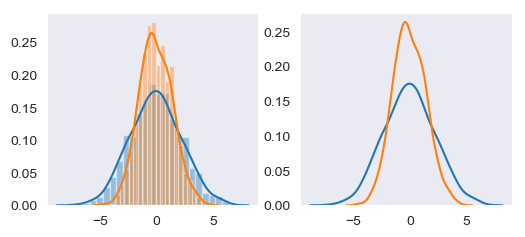

In [172]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], 1000)
data = pd.DataFrame(data, columns=['x', 'y'])

plt.figure(figsize=(6, 2.5))
ax1 = plt.subplot(1, 2, 1)    
for col in 'xy':
    sns.distplot(data[col].values, ax=ax1)
ax2 = plt.subplot(1, 2, 2)
for col in 'xy':
    sns.kdeplot(data[col].values, ax=ax2)

新版本的`sns.kdeplot`不再支持直接传入一个二维数组，但是可以分别传入$x$和$y$数组直接画等高线：

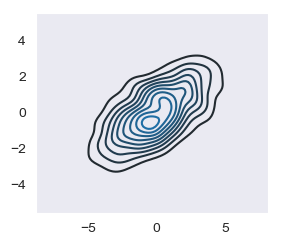

In [173]:
plt.figure(figsize=(3, 2.6))
sns.kdeplot(data['x'].values, data['y'].values);

#### 矩阵图

当对多维的数据进行可视化时，最终都要使用矩阵图（`pairplot`），用于可视化多维数据不同维度间的相关性，`hue`参数可以理解为指定标签列，根据此列作图时使用不同颜色，`height`参数控制每一个子图的大小（子图均为正方形）：

In [196]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


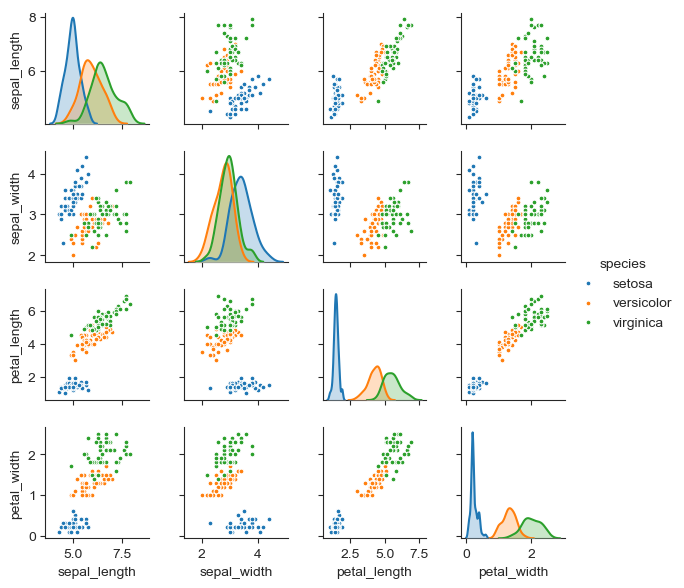

In [205]:
sns.pairplot(iris, hue='species', height=1.5, plot_kws={'s':12});

#### 分面频次直方图

`sns.FacetGrid`主要的作用是提供一个快速做出子图的接口，有点数据透视表的意思，可以理解成先通过`data`参数收集数据，通过`row`,`col`参数选择需要分子图展示的标签，返回一个`FacetGrid`对象，然后调用对象的`map`方法选取画图的类型。

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


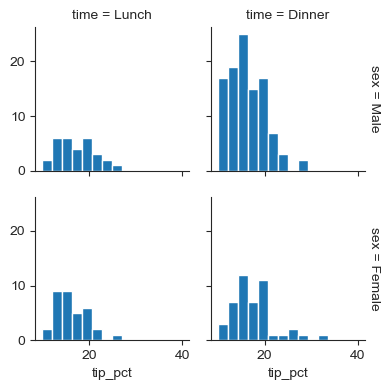

In [255]:
# 分类观察不同性别，不同时间的小费占比的直方图，可以通过向map传递不同的画图函数获取不同的图形
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True, height=2)
grid.map(plt.hist, "tip_pct", bins=np.linspace(10, 40, 15));

####  因子图

`sns.factorplot`已经改成了`catplot`，因此现在叫分类图更合适，是对`sns.FacetGrid`更高级别的包装，适用于一组数据但是归属不同类别的场景，主要有如下几个重要的参数：  
1. `kind`用来选择底层的axes级别的绘图函数：
 1. 散点绘图函数：  
    - `stripplot`: kind="strip"，默认使用这个，[官网函数说明](http://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot)
    - `swarmplot`: kind="swarm"，和`stripplot`类似，但是点不会重合，[官网函数说明](http://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot)
 2. 分布绘图函数：
    - `boxplot`: kind="box"，[官网函数说明](http://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)
    - `violinplot`: kind="violin", [官网函数说明](http://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot)
    - `boxenplot`: kind="boxen"，[官网函数说明](http://seaborn.pydata.org/generated/seaborn.boxenplot.html?highlight=boxenplot#seaborn.boxenplot)
 3. 估计函数：
    - `pointplot`: kind="point"，[官网函数说明](http://seaborn.pydata.org/generated/seaborn.pointplot.html?highlight=pointplot#seaborn.pointplot)
    - `barplot`: kind="bar"，[官网函数说明](http://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)
    - `countplot`: kind="count"，[官网函数说明](http://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot)
2. `height`  
每个子图的高，和`aspect`一起确定子图的大小。
3. `aspect`  
每个面宽高比，因此"Aspect * height"给出子图的宽度。

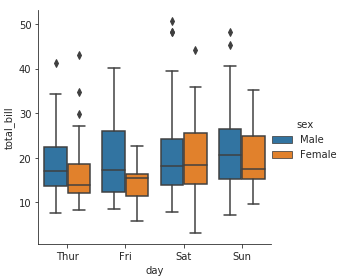

In [7]:
with sns.axes_style('ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box", height=4)    

#### 联合分布图

`sns.jointplot`可以画出KDE和密度的联合分布图，`kind`参数可以为`scatter`,`reg`（散点加回归加误差）,`resid`,`kde`,`hex`，实现不同的效果：

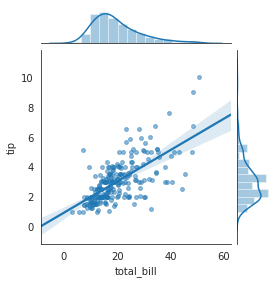

In [22]:
tips = sns.load_dataset('tips')
with sns.axes_style('white'):
    sns.jointplot(
        "total_bill",
        "tip",
        tips,
        kind="reg",
        height=4,
        joint_kws={'scatter_kws': {
            's': 15,
            'alpha': 0.5
        }})

#### 条形图

时间序列可以用`factorplot`画出条形图：

In [23]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


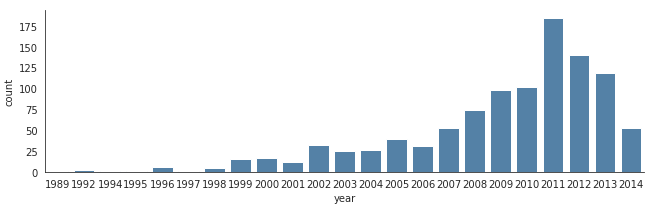

In [30]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, kind="count", color="steelblue", aspect=3, height=3)

对比不同方法（`method`参数）发现行星的数量：

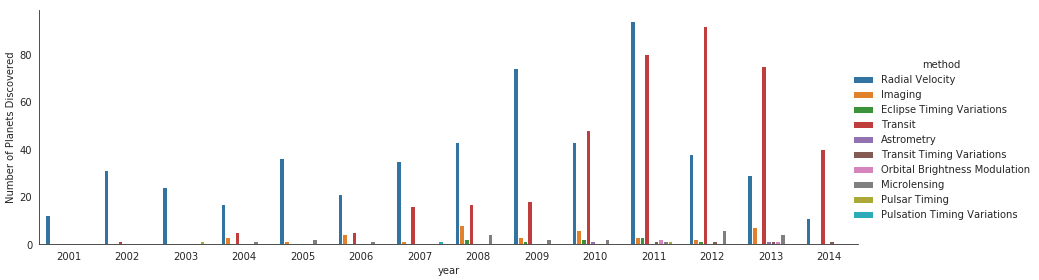

In [38]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=3, height=4, kind="count", hue="method", order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Matplotlib常见问题收集

1. [如何给子图设置colorbar？](https://www.jianshu.com/p/d97c1d2e274f)
2. [如何绘制各种形状和线条？](https://blog.csdn.net/qq_27825451/article/details/82967904)